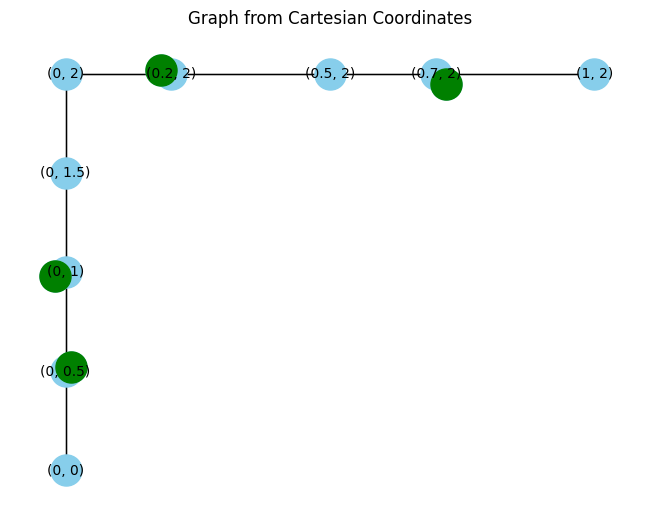

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_graph_from_coordinates(coordinates, separate_points=None, separate_points_labels=None):
    G = nx.Graph()
    for i, coord in enumerate(coordinates):
        G.add_node(i, pos=coord)
    for i in range(len(coordinates) - 1):
        dist = np.linalg.norm(np.array(coordinates[i]) - np.array(coordinates[i + 1]))
        G.add_edge(i, i + 1, weight=dist)
    if separate_points:
        for i, coord in enumerate(separate_points):
            G.add_node(len(coordinates) + i, pos=coord)

    pos = nx.get_node_attributes(G, 'pos')
    labels = {i: f"{coord}" for i, coord in enumerate(coordinates)}

    nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='skyblue', font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)
    
    if separate_points:
        nx.draw_networkx_nodes(G, pos, nodelist=range(len(coordinates), len(coordinates) + len(separate_points)), node_size=500, node_color='green')
        if separate_points_labels:
            for i, coord in enumerate(separate_points):
                plt.text(coord[0], coord[1], f"Prob: {separate_points_labels[i]:.4f}\n", fontsize=10, ha='center', va='center', color='black')

    plt.title('Graph from Cartesian Coordinates')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# states = [(0,0),(0,0.5),(0,1),(0,1.5),(0,2),(0.2,2),(0.5, 2),(0.7,2),(1,2)]
# observations = [(0,0.5),(0,1.5), (0.2, 2), (0.7, 2)]

states = [(0,0), (0,0.5), (0,1), (0,1.5), (0,2), (0.2,2), (0.5,2), (0.7,2), (1,2)]
# observations = [(-0.2,0.25), (-0.2,1.25), (0.35,1.8), (0.8,2.2)]
observations = [(0.01,0.52), (-0.02,0.98), (0.18,2.02), (0.72,1.95)]
beta = 0.865617024533378

plot_graph_from_coordinates(states, observations)


In [66]:
import numpy as np
def calculate_transition_probabilities(states, observations, beta):
    num_states = len(states)
    transition_prob = np.zeros((num_states, num_states))
    num_observations = len(observations)
    for t in range(num_observations-1):  #since we have 4 observations
        z_t = np.array(observations[t])
        z_next = np.array(observations[t + 1])
        observation_distance = np.linalg.norm(z_next - z_t)

        for i in range(num_states):
            x_t = np.array(states[i])
            for j in range(num_states):
                x_next = np.array(states[j])
                state_distance = np.linalg.norm(x_next - x_t)
                d_ij = abs(state_distance - observation_distance)
                
                # Calculate transition probability using the given formula
                transition_prob[i, j] = 1 / beta * np.exp(-d_ij / beta)

    # Normalize transition probabilities
    transition_prob /= np.sum(transition_prob, axis=1, keepdims=True)
    return transition_prob

# Define states and observations
states = [(0, 0), (0, 0.5), (0, 1), (0, 1.5), (0, 2), (0.2, 2), (0.5, 2), (0.7, 2), (1, 2)]
# observations = [(-0.2, 0.5), (-0.2, 1.5), (0.2, 1.8), (0.7, 2.2)]
observations = [(-0.2,0.5), (-0.2,1.5), (0.2,1.8), (1,2.2)]
beta = 0.865617024533378
def print_array_in_single_line(arr):
    for row in arr:
        print(', '.join(f'{val:.6f}' for val in row))
transition_probs = calculate_transition_probabilities(states, observations, beta)
print("Transition Probabilities:")
print_array_in_single_line(transition_probs)

Transition Probabilities:
0.097724, 0.174125, 0.243100, 0.136435, 0.076572, 0.075694, 0.071316, 0.066739, 0.058295
0.134533, 0.075504, 0.134533, 0.187825, 0.105413, 0.103809, 0.095981, 0.088101, 0.074300
0.141260, 0.101181, 0.056786, 0.101181, 0.141260, 0.138065, 0.123254, 0.109475, 0.087539
0.080027, 0.142592, 0.102135, 0.057321, 0.102135, 0.106782, 0.129743, 0.154849, 0.124416
0.051470, 0.091709, 0.163408, 0.117044, 0.065689, 0.082763, 0.117044, 0.147466, 0.163408
0.053717, 0.095349, 0.168615, 0.129192, 0.087377, 0.069351, 0.098077, 0.123569, 0.174753
0.053374, 0.092974, 0.158748, 0.165545, 0.130319, 0.103434, 0.073139, 0.092149, 0.130319
0.048162, 0.082288, 0.135957, 0.190511, 0.158317, 0.125656, 0.088853, 0.070522, 0.099734
0.041150, 0.067883, 0.106344, 0.149731, 0.171605, 0.173829, 0.122916, 0.097558, 0.068984


In [65]:
import numpy as np
import math

def calculate_emission_probabilities(states, observations, sigma_z):
    num_states = len(states)
    num_observations = len(observations)
    emission_prob = np.zeros((num_states, num_observations))
    for i in range(num_states):
        x_t = np.array(states[i])
        for t in range(num_observations):
            z_t = np.array(observations[t])
            observation_distance = np.linalg.norm(z_t - x_t)
            
            # Calculate emission probability using Gaussian distribution formula
            p_z_given_x = (1 / (math.sqrt(2 * math.pi) * sigma_z)) * np.exp(-0.5 * (observation_distance / sigma_z) ** 2)
            emission_prob[i, t] = p_z_given_x
    emission_prob /= np.sum(emission_prob, axis=1, keepdims=True)

    return emission_prob
states = [(0, 0), (0, 0.5), (0, 1), (0, 1.5), (0, 2), (0.2, 2), (0.5, 2), (0.7, 2), (1, 2)]
# observations = [(-0.2, 0.5), (-0.2, 1.5), (0.2, 1.8), (0.7, 2.2)]
# observations = [(-0.2,0.5), (-0.2,1.5), (0.2,1.8), (1,2.2)]
observations = [(0.01,0.52), (-0.02,0.98), (0.18,2.02), (0.72,1.95)]

sigma_z = 2.593490783789292

def print_array_in_single_line(arr):
    for row in arr:
        print(', '.join(f'{val:.6f}' for val in row))
emission_probs = calculate_emission_probabilities(states, observations, sigma_z)
print("Emission Probabilities")
print_array_in_single_line(emission_probs)

Emission Probabilities
0.290568, 0.276034, 0.218375, 0.215023
0.274256, 0.269601, 0.230429, 0.225714
0.258275, 0.262723, 0.242599, 0.236402
0.242678, 0.255445, 0.254838, 0.247039
0.227514, 0.247813, 0.267095, 0.257578
0.226016, 0.245962, 0.266681, 0.261341
0.223754, 0.243175, 0.266022, 0.267050
0.222236, 0.241310, 0.265556, 0.270898
0.219945, 0.238503, 0.264820, 0.276732


In [51]:
import itertools
import numpy as np
import pandas as pd

states = [(0, 0), (0, 0.5), (0, 1), (0, 1.5), (0, 2), (0.2, 2), (0.5, 2), (0.7, 2), (1, 2)]
# observations = [(-0.2, 0.5), (-0.2, 1.5), (0.2, 1.8), (0.7, 2.2)]
observations = [(-0.2,0.5), (-0.2,1.5), (0.2,1.8), (1,2.2)]

all_combinations = list(itertools.combinations(states, 4))
# pi = np.array([0.25, 0.7, 0.00714, 0.00714, 0.00714, 0.00714, 0.00714, 0.00714, 0.00714])
pi = np.array([0.2, 0.5, 0.1, 0.2/6, 0.2/6, 0.2/6, 0.2/6, 0.2/6, 0.2/6 ])

# pi = np.array([0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111, 0.111])


valid_sequences = []
for sequence in all_combinations:
    if len(set(sequence)) == 4:  
        valid_sequences.append(sequence)

Prob = []
index = []
for seq in valid_sequences:
    seq_as_list = [list(coord) for coord in seq]
    id = np.array([states.index(coord) for coord in seq]) 
    index.append(id)
Index = np.vstack(index)
for i in range(126):
    # print(Index[i])
    r0 = Index[i][0]
    # print(r0)
    P = 1
    ps = pi[r0] * emission_probs[r0][0]
    if i== 74:
        ps = 0
    else:
        for j in range(1,4):
            rA = Index[i][j-1]
            cA = Index[i][j]
            P *= transition_probs[rA][cA] * emission_probs[cA][j]
            # print(P)
        ps *= P
        Prob.append(ps) 
Prob = np.array(Prob).reshape(125, 1)
# print(Prob)
m = max(Prob)
print(m)
ind = np.argmax(Prob)
print(index[ind])

[8.43373622e-06]
[1 3 5 7]


In [29]:
import numpy as np
def viterbi(separate_points, coordinates, pi, transition_probs, emission_probs):
    vit = np.zeros((len(coordinates), len(separate_points)))
    back = np.zeros((len(coordinates), len(separate_points)))
    for s in range(len(coordinates)):
        vit[s, 0]=pi[s] * emission_probs[s, 0]
        back[s, 0] = 0
    for t in range(1, len(separate_points)):
        for s in range(len(coordinates)):
            # max_prob = -np.inf
            # best_prev_state = 0
            prob = np.zeros(len(states))
            for sp in range(len(coordinates)):
                p = vit[sp, t-1] * transition_probs[sp, s] * emission_probs[s, t]
                prob[sp] = p
                print(prob)
                # if prob > max_prob:
                #     max_prob = prob
                #     best_prev_state = sp
            print(s)
            vit[s,t] = np.max(prob)
            # print(vit)
            back[s, t] = np.argmax(prob)
            print("t={}, s={}: {}".format(t, s, prob))
            # print(back)
    It = np.argmax(vit[:, len(separate_points)])
    # for t in range(1, len(separate_points), -1):
        # I[t] = back[I, t]
    # bestpathprob = np.max(vit[:, len(separate_points) - 1])
    # bestpathpointer = np.argmax(vit[:, len(separate_points) - 1])

    # for t in range(len(separate_points)-1):  
    # return vit, back, bestpathprob, bestpathpointer
vit, back, bestpathprob, bestpathpointer = viterbi(observations, states, pi, transition_probs, emission_probs)
print("Viterbi Matrix:")
print(vit)
print("\nBackpointer Matrix:")
print(back)

[0.0017866 0.        0.        0.        0.        0.        0.
 0.        0.       ]
[0.0017866  0.00564274 0.         0.         0.         0.
 0.         0.         0.        ]
[0.0017866  0.00564274 0.00089884 0.         0.         0.
 0.         0.         0.        ]
[0.0017866  0.00564274 0.00089884 0.00015538 0.         0.
 0.         0.         0.        ]
[1.78659661e-03 5.64274476e-03 8.98838745e-04 1.55377026e-04
 9.09105683e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[1.78659661e-03 5.64274476e-03 8.98838745e-04 1.55377026e-04
 9.09105683e-05 9.26050747e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
[1.78659661e-03 5.64274476e-03 8.98838745e-04 1.55377026e-04
 9.09105683e-05 9.26050747e-05 8.84701510e-05 0.00000000e+00
 0.00000000e+00]
[1.78659661e-03 5.64274476e-03 8.98838745e-04 1.55377026e-04
 9.09105683e-05 9.26050747e-05 8.84701510e-05 8.23821456e-05
 0.00000000e+00]
[1.78659661e-03 5.64274476e-03 8.98838745e-04 1.55377026e-04
 9.09105683e-05

In [70]:
import numpy as np

def calculate_transition_probabilities(states, observations, beta):
    num_states = len(states)
    transition_pro = np.zeros((num_states, num_states))
    num_observations = len(observations)
    
    for t in range(num_observations-1):
        z_t = np.array(observations[t])
        z_next = np.array(observations[t + 1])
        observation_distance = np.linalg.norm(z_next - z_t)

        for i in range(num_states):
            x_t = np.array(states[i])
            for j in range(num_states):
                x_next = np.array(states[j])
                state_distance = np.linalg.norm(x_next - x_t)
                d_ij = abs(state_distance - observation_distance)
                transition_pro[i, j] += 1 / beta * np.exp(-d_ij / beta)
        
        transition_pro /= np.sum(transition_pro, axis=1, keepdims=True)

    # Normalize the resultant product matrix after all iterations
    normalized_transition_pro = np.linalg.matrix_power(transition_pro, num_observations - 1)
    normalized_transition_pro /= np.sum(normalized_transition_pro, axis=1, keepdims=True)

    return normalized_transition_pro

# Define states and observations
states = [(0, 0), (0, 0.5), (0, 1), (0, 1.5), (0, 2), (0.2, 2), (0.5, 2), (0.7, 2), (1, 2)]
observations = [(-0.2, 0.5), (-0.2, 1.5), (0.2, 1.8), (0.7, 2.2)]
beta = 0.865617024533378

def print_array_in_single_line(arr):
    for row in arr:
        print(', '.join(f'{val:.6f}' for val in row))

transition_pro = calculate_transition_probabilities(states, observations, beta)
print("Transition Probabilities:")
print_array_in_single_line(transition_pro)


Transition Probabilities:
0.081492, 0.107564, 0.127121, 0.135116, 0.115391, 0.114013, 0.112658, 0.108154, 0.098492
0.079149, 0.103074, 0.125577, 0.135961, 0.116754, 0.115355, 0.114051, 0.109699, 0.100381
0.074509, 0.100039, 0.122597, 0.136061, 0.118786, 0.117476, 0.116173, 0.111723, 0.102636
0.070270, 0.096108, 0.120734, 0.135691, 0.120451, 0.119414, 0.118559, 0.113998, 0.104777
0.068073, 0.093615, 0.119564, 0.136613, 0.120827, 0.119704, 0.119540, 0.115635, 0.106429
0.067995, 0.093504, 0.119539, 0.136909, 0.121007, 0.119589, 0.119186, 0.115512, 0.106760
0.067718, 0.093177, 0.119139, 0.136979, 0.121777, 0.120114, 0.118948, 0.115107, 0.107042
0.067411, 0.092933, 0.118808, 0.136586, 0.122159, 0.120720, 0.119373, 0.115109, 0.106901
0.066609, 0.092271, 0.118427, 0.136230, 0.122002, 0.121066, 0.120463, 0.116010, 0.106921


In [52]:
def viterbi(separate_points, coordinates, pi, transition_probs, emission_probs):
    vit = np.zeros((len(coordinates), len(separate_points)))
    back = np.zeros((len(coordinates), len(separate_points)))
    for s in range(len(coordinates)):
        vit[s, 0]=pi[s] * emission_probs[s, 0]
        back[s, 0] = 0
    for t in range(1, len(separate_points)):
        for s in range(len(coordinates)):
            max_prob = -np.inf
            best_prev_state = 0
            for prev_state in range(len(coordinates)):
                prob = vit[prev_state, t-1] * transition_probs[prev_state, s] * emission_probs[s, t]
                if prob > max_prob:
                    max_prob = prob
                    best_prev_state = prev_state
            vit[s,t] = max_prob
            back[s, t] = best_prev_state
    bestpathprob = np.max(vit[:, len(separate_points) - 1])
    bestpathpointer = np.argmax(vit[:, len(separate_points) - 1])
    return vit, back, bestpathprob, bestpathpointer
vit, back, bestpathprob, bestpathpointer = viterbi(observations, states, pi, transition_probs, emission_probs)

print("Viterbi Matrix:")
print(vit)
print("\nBackpointer Matrix:")
print(back)

Viterbi Matrix:
[[6.01593568e-02 5.64274476e-03 1.81763074e-04 8.80480413e-06]
 [1.40393492e-01 3.20090245e-03 2.85222529e-04 8.18156382e-06]
 [2.61525440e-02 5.69244439e-03 3.26086967e-04 9.85656150e-06]
 [8.10190766e-03 6.35068978e-03 1.87343520e-04 1.15836709e-05]
 [7.51391282e-03 3.56061691e-03 2.00491393e-04 1.06939442e-05]
 [7.42360906e-03 3.46428893e-03 2.00503799e-04 1.07015612e-05]
 [7.28729141e-03 3.14424611e-03 2.09395779e-04 9.89370281e-06]
 [7.19587733e-03 2.84989588e-03 2.24324825e-04 8.99260992e-06]
 [7.05802261e-03 2.35740696e-03 1.93433713e-04 8.43373622e-06]]

Backpointer Matrix:
[[0. 1. 2. 1.]
 [0. 0. 0. 2.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 2. 2.]
 [0. 1. 3. 2.]
 [0. 1. 3. 2.]
 [0. 1. 3. 2.]
 [0. 1. 3. 5.]]
